<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/FishEye_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

Cloning into 'AP_Test_OPEN'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 329 (delta 2), reused 0 (delta 0), pack-reused 322
Receiving objects: 100% (329/329), 196.32 MiB | 11.85 MiB/s, done.
Resolving deltas: 100% (204/204), done.


(720, 1140, 3)


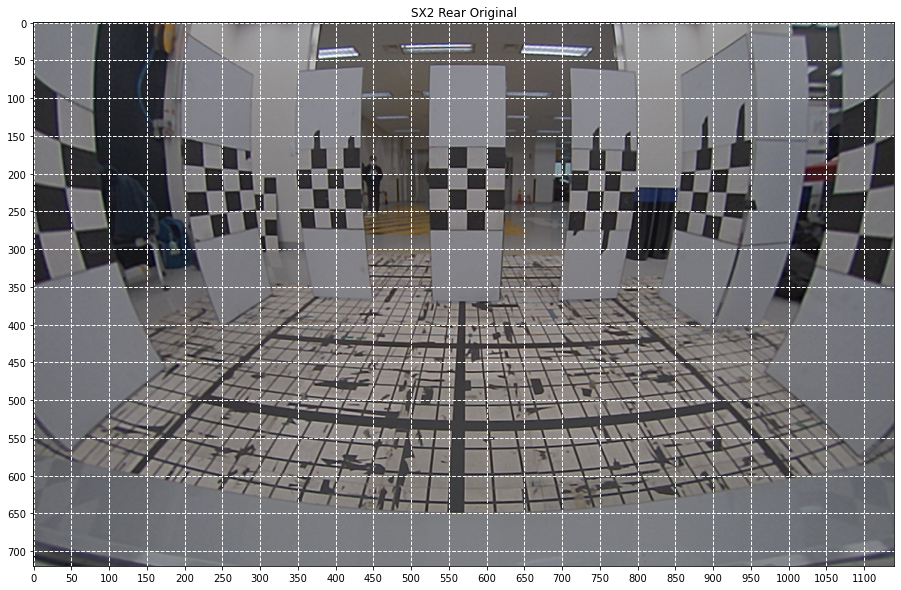

In [3]:
import cv2
import matplotlib.pyplot as plt
original = cv2.imread('/content/AP_Test_OPEN/ViewMode_R.bmp')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

img = cv2.imread('/content/AP_Test_OPEN/ViewMode_R.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(20, 10))
plt.imshow(original)
plt.title('SX2 Rear Original')
plt.grid(color='white', linestyle='--', linewidth=1)
plt.xticks(np.arange(0, original.shape[1], 50));
plt.yticks(np.arange(0, original.shape[0], 50));
print(original.shape)

In [ ]:
import cv2
# assert cv2.__version__[0] == '3', 'The fisheye module requires opencv version >= 3.0.0'
import numpy as np
import os
import glob

CHECKERBOARD = (6,9)

print(CHECKERBOARD)
subpix_criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_CHECK_COND+cv2.fisheye.CALIB_FIX_SKEW
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
_img_shape = None
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('source/*.jpg')
for fname in images:
    img = cv2.imread(fname)
    if _img_shape == None:
        _img_shape = img.shape[:2]
    else:
        assert _img_shape == img.shape[:2], "All images must share the same size."
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
        imgpoints.append(corners)

print('img end')
N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
rms, _, _, _, _ = \
    cv2.fisheye.calibrate(
        objpoints,
        imgpoints,
        gray.shape[::-1],
        K,
        D,
        rvecs,
        tvecs,
        calibration_flags,
        (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
    )
print("Found " + str(N_OK) + " valid images for calibration")
print("DIM=" + str(_img_shape[::-1]))
print("K=np.array(" + str(K.tolist()) + ")")
print("D=np.array(" + str(D.tolist()) + ")")

(6, 9)
img end


NameError: ignored

In [ ]:
import numpy as np
import cv2
import sys
import os

# You should replace these 3 lines with the output in calibration step
DIM=##
K=##
D=##

def undistort(img_path):
    img = cv2.imread(img_path)
    h,w = img.shape[:2]
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    # cv2.imshow("undistorted", undistorted_img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    cv2.imwrite('out_' + os.path.basename(img_path), undistorted_img)
if __name__ == '__main__':
    for p in sys.argv[1:]:
        undistort(p)